## Table of Contents
- [1 - Problem statement](#1)
- [2 - Import useful libraries](#2)
- [3 - Loading Dataset](#3)

    - [example 1](#ex-1)

<a name='1'></a>
## 1 - Problem Statement
The dataset is provided by 
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Task:
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

<a name='2'></a>
## 2 - Import useful libraries ##

In [5]:
# standard libraries
import numpy as np 
import pandas as pd 

# time libraries 
from tqdm import tqdm
from time import time

# visualization library
import umap.umap_ as UMAP

# resampling libraries
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler

# useful library
from collections import Counter

# scikit-learn libraries for preprocessing and report analysis 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report, confusion_matrix

# tensorflow libraries for Neural Network implementation
import tensorflow as tf
from tensorflow.keras import Sequential, initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# library for hyperparameters tuning
import keras_tuner as kt

# standard plot library
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<a name='3'></a>
## 3 - Loading and Data description ##
Dataset 27 features and 1 target, for a total of $10^6$ instances. 
* <span style="color:blue">**blue**</span> $\rightarrow$ redundant features
* <span style="color:red">**red**</span> $\rightarrow$ features with wrong data type
* <span style="color:green">**green**</span> $\rightarrow$ target
* (#) $\rightarrow$ numerical feature
* (A) $\rightarrow$ categorical feature

1. (<span style="color:blue">**A**</span>) **ID**: Represents a unique identification of an entry;
2. (A) **Customer_ID**: Represents a unique identification of a person;
3. (A) **Month**: Represents the month of the year;
4. (<span style="color:blue">**A**</span>) **Name**: Represents the name of a person;
5. (<span style="color:red">**A**</span>) **Age**: Represents the age of the person;
6. (<span style="color:blue">**A**</span>) **SSN**: Represents the social security number of a person;
7. (A) **Occupation**: Represents the occupation of the person;
8. (<span style="color:red">**A**</span>) **Annual_Income**: Represents the annual income of the person;
9. (#) **Monthly_Inhand_Salary**: Represents the monthly base salary of a person;
10. (#) **Num_Bank_Accounts**: Represents the number of bank accounts a person holds;
11. (#) **Num_Credit_Card**: Represents the number of other credit cards held by a person;
12. (#) **Interest_Rate**: Represents the interest rate on credit card;
13. (<span style="color:red">**A**</span>) **Num_of_Loan**: Represents the number of loans taken from the bank;
14. (A) **Type_of_Loan**: Represents the types of loan taken by a person;
15. (#) **Delay_from_due_date**: Represents the average number of days delayed from the payment date;
16. (<span style="color:red">**A**</span>) **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person;
17. (#) **Changed_Credit_Limit**: Represents the percentage change in credit card limit;
18. (#) **Num_Credit_Inquiries**: Represents the number of credit card inquiries;
19. (A) **Credit_Mix**: Represents the classification of the mix of credits;
20. (<span style="color:red">**A**</span>) **Outstanding_Debt**: Represents the remaining debt to be paid (in USD);
21. (#) **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card;
22. (<span style="color:red">**A**</span>) **Credit_History_Age**: Represents the age of credit history of the person;
23. (A) **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person;
24. (#) **Total_EMI_per_month**: Represents the monthly EMI payments (in USD);
25. (<span style="color:red">**A**</span>) **Amount_invested_monthly**: Represents the monthly amount invested by the customer (in USD);
26. (A) **Payment_Behaviour**: Represents the payment behavior of the customer (in USD);
27. (#) **Monthly_Balance**: Represents the monthly balance amount of the customer (in USD);
28. (<span style="color:green">**A**</span>) **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good).

In [6]:
# low_memory=False because it has 26 columns with mixed types
df = pd.read_csv("../Data/train.csv", low_memory=False)
# remove redundant features
df.drop(columns=['ID', 'Name', 'SSN'], inplace=True)

n_rows, n_cols = df.shape
print(f'Dataset shape: {n_rows, n_cols}')

n1 = 12
print(f'First {n1} columns')
df.iloc[:, :n1].head()

Dataset shape: (100000, 25)
First 12 columns


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6


In [7]:
print(f'Last {n_cols - n1} columns')
df.iloc[:, n1:].head()

Last 13 columns


,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
import pandas_profiling as pp
#pp.ProfileReport(df, title = 'Pandas Profiling report of "dataset"', html = {'style':{'full_width': True}})

<a name='4'></a>
## 4 - Clean the dataset ##
Replace with None values artifacts of the features 'Monthly_Balance', 'Amount_invested_monthly' and 'Payment_Behaviour'.

In [8]:
artifacts = ['__-333333333333333333333333333__', '__10000__', '!@9#%8']
df.replace(artifacts, np.nan, inplace=True)

For the 'Credit_History_Age' feature, the years and months are coded as total months, then the variable is casted as numeric.

In [9]:
df.loc[df.Credit_History_Age.notna(),
       'Credit_History_Age'] = df['Credit_History_Age'].str.extractall('(\d+)').unstack().astype(float).multiply([12, 1]).sum(axis=1)
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)

We can show that all missing values of 'Type_of_Loan' corresponds to 'Num_of_Loan' = 0. So we indicate that values with 'no Loan'. 
Previously we made dummy variables for whether each of the 10 possible loan types were represented in the row. This turned out to reduce the accuracy of the model by $15\%$.

In [10]:
df['Type_of_Loan'].fillna('no Loan', inplace=True)

Remove the '_' character to cast the wrong assigned categorical features into numerical features.

In [11]:
# categorical features
cat = df.drop(columns=['Credit_Score',
                       'Customer_ID']).select_dtypes(include=["object"]).columns

# find all the categorical features which contain the character '_'  
features = [feature for feature in cat if df[feature].str.contains('_').any()]

# remove the character '_' from all the selected categorical features
for feature in features:
    df[feature] = df[feature].str.replace("_", "")

# select all the wrong assigned categorical features
features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
            'Monthly_Balance']

# casting the features 
for feature in features:
    df[feature] = pd.to_numeric(df[feature]).astype('float')
    
cat = df.drop(columns=['Credit_Score',
                       'Customer_ID']).select_dtypes(include=["object"]).columns    
num = df.select_dtypes(include=["number"]).columns
# let's take a copy of the dataframe to backup some data
df_old = df.copy()

<a name='5'></a>
## 5 - Outlier Detection ##
We have considered the box plot of all the features in order to detect outliers in the dataset.

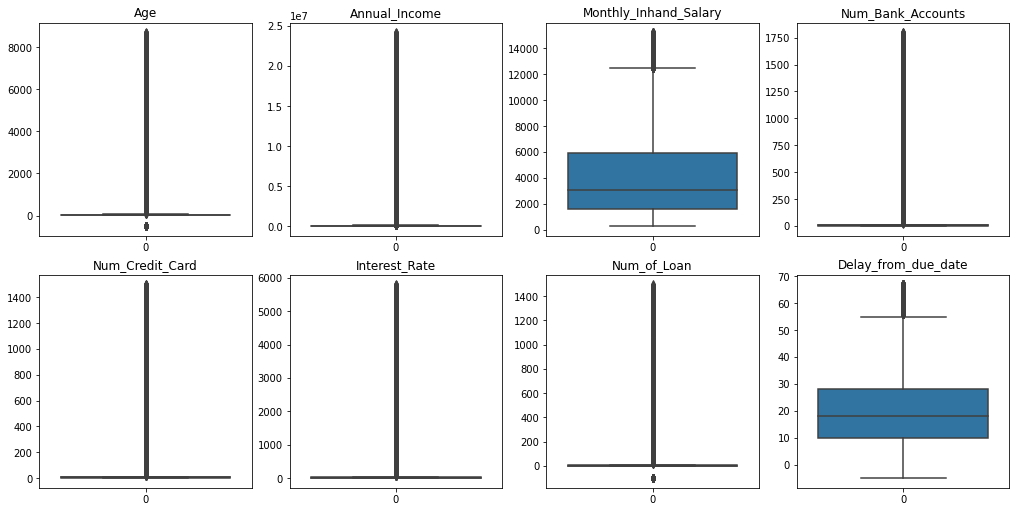

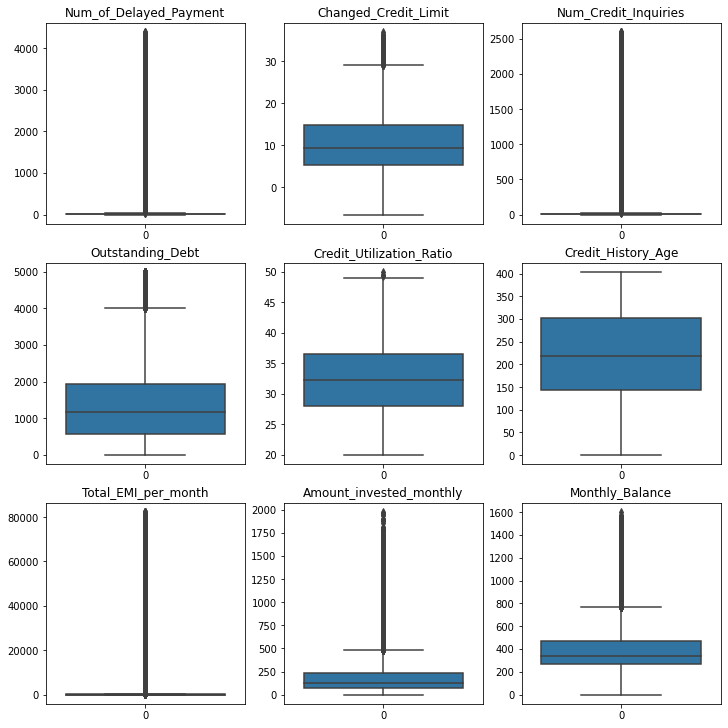

In [ ]:
%matplotlib inline
def box_plot_utility(df):
    fig, axs = plt.subplots(2, 4, figsize=(14,7), constrained_layout=True)

    for col, ax in zip(num[:8], axs.flatten()):
        sns.boxplot(data=df[col], ax=ax)
        ax.set_title(col)
    plt.show()

    fig, axs = plt.subplots(3, 3, figsize=(10,10), constrained_layout=True)

    for col, ax in zip(num[8:], axs.flatten()):
        sns.boxplot(data=df[col], ax=ax)
        ax.set_title(col)

box_plot_utility(df)   

We can see that most features have outliers, but we can show that most data is easily recovered. 

In [12]:
from statistics import mode

features_tmp = ['Age','Annual_Income', 'Num_Bank_Accounts', 'Occupation',
                'Num_Credit_Card', 'Num_of_Loan', 'Interest_Rate',
                'Outstanding_Debt']

for feature in features_tmp:
    tmp = df[['Customer_ID',
               feature]].groupby('Customer_ID')[feature].apply(mode)
    df[feature] = df['Customer_ID'].map(tmp.to_dict())


# Restore back the 'Occupation' values where the algorithm fail
customers_wrong = df.loc[df.Occupation == '', 'Customer_ID'].unique()
for customer in customers_wrong:
    df.loc[df.Customer_ID == customer,
           'Occupation'] = df_old.loc[df_old.Customer_ID == customer,
                                      'Occupation'].unique()[1]


# Restore back the 'Num_Credit_Card' values where the algorithm fail
tmp_num_cc = df_old.loc[df_old['Num_Bank_Accounts'] == -1,
                        'Num_Credit_Card']
tmp_num_cc.loc[55636] = 4
df.loc[tmp_num_cc.index, 'Num_Credit_Card']


# Set to NaN values some typos 
df.loc[df['Num_Credit_Inquiries'] > 20, 'Num_Credit_Inquiries'] = np.nan
df.loc[df['Num_of_Delayed_Payment'] > 30, 'Num_of_Delayed_Payment'] = np.nan


# Drop the unuseful column Customer_ID
df.drop(columns='Customer_ID', inplace=True)

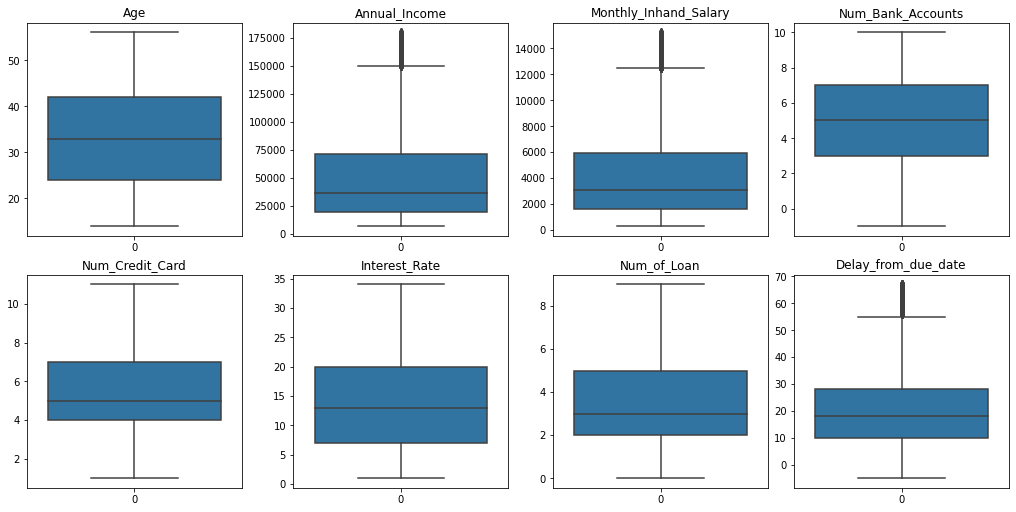

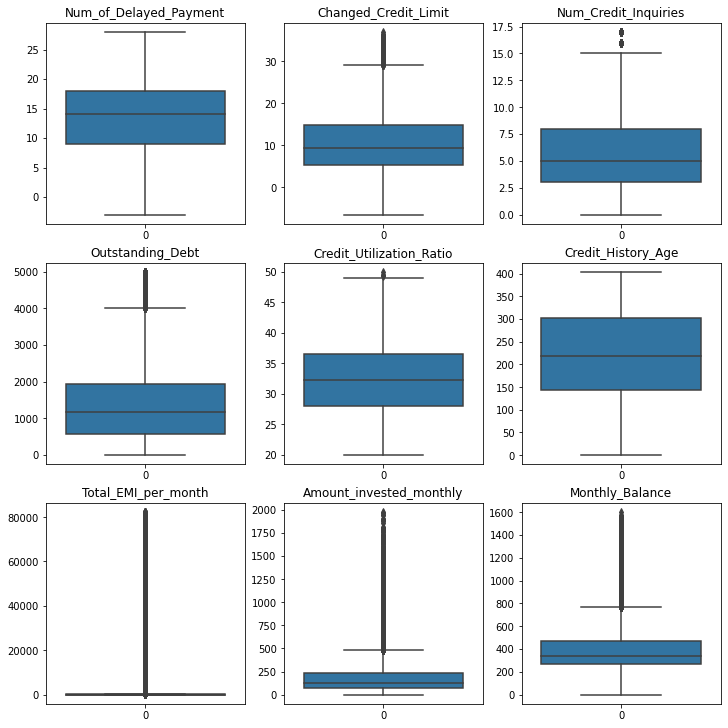

In [ ]:
box_plot_utility(df)   

<a name='6'></a>
## 6 - Model and visualization ##

### Splitting up the data ###
The data is split into Training, Validation, and Test sets, with 60%, 20%, and 20% ratios, respectively.

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    df.drop(columns=["Credit_Score"]),
    df["Credit_Score"],
    test_size= 0.20,
    shuffle=True
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size= 0.25,
    random_state= 42,
    shuffle=True
    )

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((60000, 23), (20000, 23), (20000, 23))

### Data preparation ###
#### Imbalanced learning ####
As the data is somewhat imbalanced, RandomOverSampler is used to generate new datapoints of the least represented target values.

#### Onehot-encoding ####
The categorical features are one hot encoded to features giving "1" or "0" for each possible category. This heavily increases the dimensionality of the data, mostly due to the feature "Type_of_Loan", which has over 6000 categories. This feature has, however, proven to be crucial for the accuracy of the model.

#### Feature scaling ####
To improve the chances of converging during training, the data is scaled by MaxAbsScaler.

In [ ]:
# Oversampling due to imbalance
sampler = RandomOverSampler() 

X_train, y_train = sampler.fit_resample(X_train, y_train)


# Making a pipeline for transforming

cat_preprocessor = Pipeline(
    [("imputer", SimpleImputer(strategy="most_frequent")),
     ("onehot", OneHotEncoder(sparse=True, handle_unknown="ignore"))]
    )

num_preprocessor = Pipeline(
    [("imputer", SimpleImputer(strategy="median"))]
    )  

preprocessor = ColumnTransformer(
    [("categorical", cat_preprocessor, cat), 
    ("numerical", num_preprocessor, num)]
    )

    
# Transforming
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


# Scaling
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train).toarray()
X_val = scaler.transform(X_val).toarray()
X_test = scaler.transform(X_test).toarray()

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
sorted(Counter(y_train).items())

[(0, 31868), (1, 31868), (2, 31868)]

#### Visualization ####
The testing dataset is used for training a UMAP visualization of the data's clusters. We can see that although the Credit Scores are somewhat intertwined, especially for Credit Scores closer to each other (Standard & Good, Poor & Standard), the algorithm finds clear clusters. It is especially hard for the algorithm to differ Good from other credit scores, as can be seen in the bottom left clusters.

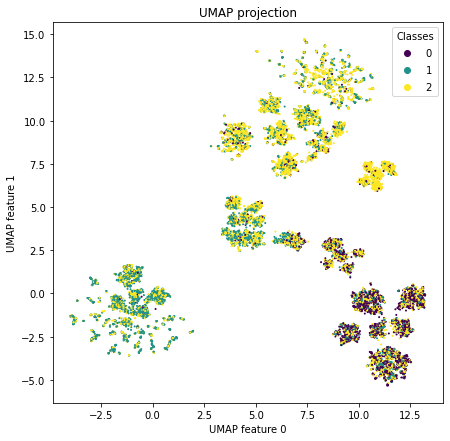

In [160]:
reducer = UMAP.UMAP(15)
embedding = reducer.fit_transform(X_test)

le = LabelEncoder()

plt.figure(figsize=(7, 7))
scatter = plt.scatter(embedding[:, 0],embedding[:, 1],  s=1, c=y_test)
plt.xlabel('UMAP feature 0')
plt.ylabel('UMAP feature 1')
plt.title('UMAP projection')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()

In [15]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,,809.98,26.822620,265.0,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,Good
2,March,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,,502.38,34.663572,378.0,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
99996,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,,502.38,40.565631,379.0,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
99997,June,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor
99998,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,LowspentLargevaluepayments,319.164979,Standard


#### Neural Network ####
To find the best hyper parameters, a different neural networks are tested by a Keras Tuner. The tuner test all combinations of the following:

* Number of hidden layers: [1, 2],
* Number of neurons per layer: [250, 500],
* Learning rates: [0.01, 0.001],
* A dropout layer with 0.8 as dropout rate is added before the output layer in order to reduce overfitting.

In [ ]:
initializer = initializers.HeNormal()

def build_model(hp):
    model = Sequential(name='Credit_Score_classification')
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(
            Dense(
                units=hp.Int(f'units_{i}', min_value=250, max_value=500,  step=250), 
                activation='relu', 
                name=f'L{i}'
                )
            )
        
    #model.add(BatchNormalization())
    model.add(Dropout(0.8, seed=123))
        
    model.add(
        Dense(
            3, kernel_initializer=initializer, activation='softmax', name=f'L{i+1}')
        )
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lrate', values=[1e-2, 1e-3])),
        loss=SparseCategoricalCrossentropy,
        metrics=['accuracy']
        )
    
    return model

### Tune the model architecture
In the function above is defined the search space for which perform the Random Search.

<center>
<img src="../images/Random vs Grid.jpeg" style="width:720px;height:350px;">
<caption><center> <u> <font color='black'> <b>Figure 1</b> </u><font color='black'>  : <b>Grid Search vs Random Search</b><br> The Random Search is a variation of the Grid Search algorithm, which randomly samples the search space instead of discretizing it with a Cartesian grid. The algorithm has no end. Instead a time budget has to be specified (i.e. a number of trials). This algorithm suffers likewise from the curse of dimensionality to reach a preset fixed sampling density. One of the advantages of random search is that if two hyper-parameters are little correlated, random search enables to find more precisely the optima of each parameter. </center></caption>

In [ ]:
import keras_tuner as kt
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=30,
    directory='keras_tuner',
    project_name="Credit_Score_classification",
    overwrite=True
)

tuner.search(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[callback] 
    )

In [ ]:
def save_model(m, filename):
    model_json = m.to_json()
    with open(filepath+filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    m.save_weights(filepath+filename+".h5")
    print("Saved model to disk")

def load_model_weights(filename, model):
    model.load_weights(filepath+filename+".h5")
    print("Loaded weights from disk")
    return model

def load_model(filename):
    json_file = open(filepath+filename+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    m = model_from_json(loaded_model_json)
    # load weights into new model
    m.load_weights(filepath+filename+".h5")
    print("Loaded model from disk")
    return m

In [ ]:
model = tuner.get_best_models()[0]
model.summary()

In [ ]:
y_pred_prob = model.predict(X_train)
y_pred = np.argmax(y_pred_prob, axis=1)


result = tf.math.confusion_matrix(y_train, y_pred)
print(result)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


result = tf.math.confusion_matrix(y_test, y_pred)
print(result)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[callback]
    )

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(ax=axs[0])
history_df[['accuracy', 'val_accuracy']].plot(ax=axs[1])

#### **Function to split data with different preprocessing procedures**
``` python 
def features_type_splitting(df, Not_specified, A_OH):
    tmp = df.copy()
    if Not_specified:
        if A_OH:
            uniq_types = tmp['Type_of_Loan'].value_counts()[:10].index
            for uniq_type in uniq_types:
                tmp[uniq_type] = tmp['Type_of_Loan'].str.count(uniq_type)
            
            features_num = list(tmp.select_dtypes(include=["number"]).columns[-10:])
            features_obj = list(tmp.select_dtypes(include=["object"]).columns)
            
            features_cat = features_num + features_obj
            for cat in features_cat:
                tmp[cat] = tmp[cat].astype('category')
            
            tmp.drop(columns='Type_of_Loan', inplace=True)
            features_cat.remove('Type_of_Loan')
        else:
            features_cat = list(tmp.select_dtypes(include=["object"]).columns)
            
            for cat in features_cat:
                tmp[cat] = tmp[cat].astype('category')
    else:
        tmp.loc[tmp['Type_of_Loan'].str.contains('Not Specified'),
                'Type_of_Loan'] = None
        
        if A_OH:
            uniq_types = tmp['Type_of_Loan'].value_counts()[:9].index
            for uniq_type in uniq_types:
                tmp[uniq_type] = tmp['Type_of_Loan'].str.count(uniq_type)
            
            features_num = list(tmp.select_dtypes(include=["number"]).columns[-9:])
            features_obj = list(tmp.select_dtypes(include=["object"]).columns)
            
            features_cat = features_num + features_obj
            for cat in features_cat:
                tmp[cat] = tmp[cat].astype('category')
                
            tmp.drop(columns='Type_of_Loan', inplace=True)
            features_cat.remove('Type_of_Loan')
        else:
            features_cat = list(tmp.select_dtypes(include=["object"]).columns)
            
            for cat in features_cat:
                tmp[cat] = tmp[cat].astype('category')
    
    features_num = list(set(tmp.drop(columns='Credit_Score').columns) - set(features_cat))
    return tmp, features_num, features_cat
``` 

#### **Function to split data in train, validation and test sets**

``` python
def data_splitting(df, cat, num, nan=False, enable=False):
    tmp = (nan*[df] + (1-nan)*[df.dropna().reset_index(drop=True)])[0].copy()
    X_train, X_test, y_train, y_test = train_test_split(tmp[num + cat], 
                                                    tmp['Credit_Score'],
                                                    test_size=0.2, shuffle=True)
    
    sampler = RandomOverSampler()
    X_train, y_train = enable*sampler.fit_resample(X_train, y_train) + \
                       (1-enable)*(X_train, y_train)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, 
        y_train,
        test_size=0.25,
        shuffle=True
        )
    return X_train, X_val, X_test, y_train, y_val, y_test
```